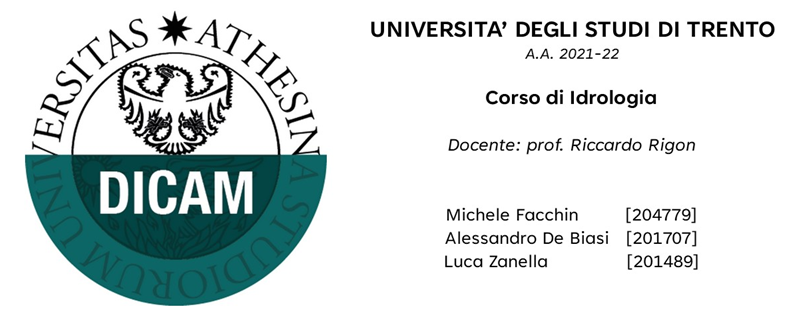

In [1]:
import os
from IPython.display import Image
whetgeo_project_path= os.path.dirname(os.getcwd())
Image(whetgeo_project_path+'\\Intestazione notebook.png')

# **Infiltrazione attraverso un terreno con tre strati e acqua superficiale**

### **Finalità** 

Analizzare l'infiltrazione attraverso un terreno composto da 3 strati (come in figura) sul quale è presente un accumulo costante di acqua di 0,05m.

Si ottengono e si rappresentano:

- Profilo verticale di SUZIONE
- Profilo verticale di CONTENUTO D'ACQUA
- Andamento nel tempo della SUZIONE a diverse profondità
- Andamento nel tempo del CONTENUTO D'ACQUA a diverse profondità
- Andamento nel tempo del FLUSSO D'ACQUA in superficie
- Andamento nel tempo del FLUSSO D'ACQUA sul fondo
- Andamento nel tempo del FLUSSO D'ACQUA cumulato in superficie
- Andamento nel tempo del FLUSSO D'ACQUA cumulato sul fondo

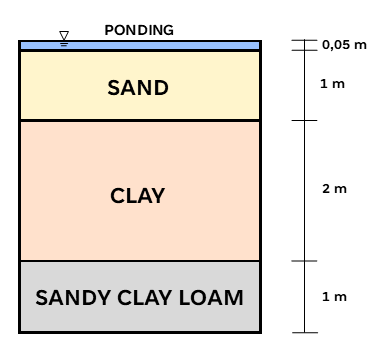

In [2]:
Image(whetgeo_project_path+'\\stratigrafia1.png')

### **Condizioni iniziali**

- Terreno saturo
- Distribuzione di pressione idrostatica


### **Condizioni al contorno**

- Fondo drenante
- Pressione d'acqua costante in superficie


### **Modello utilizzato**

Le proprietà idrauliche del terreno sono definite dal modello di Van Genuchten